In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
import pandas as pd
import numpy as np
import io

In [3]:
shp_RF=pd.read_csv('/content/drive/MyDrive/Machine Learning For Cities/final/shp_RF.csv')
weekday_RF=pd.read_csv('/content/drive/MyDrive/Machine Learning For Cities/final/weekday_RF.csv')
weekend_RF=pd.read_csv('/content/drive/MyDrive/Machine Learning For Cities/final/weekend_RF.csv')
direction=pd.read_csv('https://raw.githubusercontent.com/jehee1122/MLC-Final_traffic-problem-in-NYC/main/Data%20Cleaning/grouped%20data_seg_with%20direction.csv')

In [4]:
weekday_RF.columns

Index(['Unnamed: 0', 'label', 'daily_volume', 'Segment ID'], dtype='object')

In [5]:
shp_RF.columns

Index(['Unnamed: 0', 'StreetWidt', 'BikeLane', 'TRUCK_ROUT', 'SHAPE_Leng',
       'SegmentTyp', 'SegmentID'],
      dtype='object')

In [6]:
shp_RF['TRUCK_ROUT'] = shp_RF['TRUCK_ROUT'].replace(np.nan, 0)

In [7]:
shp_RF['BikeLane'] = shp_RF['BikeLane'].replace(np.nan, 0)

In [8]:
shp_RF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233447 entries, 0 to 233446
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  233447 non-null  int64  
 1   StreetWidt  233447 non-null  float64
 2   BikeLane    233447 non-null  float64
 3   TRUCK_ROUT  233447 non-null  float64
 4   SHAPE_Leng  233447 non-null  float64
 5   SegmentTyp  233447 non-null  object 
 6   SegmentID   233447 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.5+ MB


In [9]:
shp_dummy=pd.get_dummies(shp_RF['SegmentTyp'])
shp_dummy

,B,C,E,F,G,R,S,T,U
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
233442,0,0,0,0,0,0,0,0,1
233443,0,0,0,0,0,0,0,0,1
233444,0,0,0,0,0,0,0,0,1
233445,0,0,0,0,0,0,0,0,1


In [11]:
shp_join= shp_RF[['StreetWidt', 'BikeLane', 'TRUCK_ROUT', 'SHAPE_Leng', 'SegmentID']].merge(shp_dummy,right_index=True,left_index=True)
shp_join

,StreetWidt,BikeLane,TRUCK_ROUT,SHAPE_Leng,SegmentID,B,C,E,F,G,R,S,T,U
0,34.0,0.0,0.0,396.030947,78126,0,0,0,0,0,0,0,0,1
1,30.0,0.0,0.0,279.360514,79796,0,0,0,0,0,0,0,0,1
2,34.0,0.0,0.0,618.327133,77356,0,0,0,0,0,0,0,0,1
3,34.0,0.0,0.0,618.327133,77356,0,0,0,0,0,0,0,0,1
4,34.0,0.0,0.0,618.327133,77356,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233442,0.0,0.0,0.0,24.125705,315419,0,0,0,0,0,0,0,0,1
233443,0.0,0.0,0.0,26.261297,315420,0,0,0,0,0,0,0,0,1
233444,0.0,0.0,0.0,259.145921,331621,0,0,0,0,0,0,0,0,1
233445,0.0,0.0,0.0,67.377755,331622,0,0,0,0,0,0,0,0,1


In [12]:
shp_RF=shp_join.loc[shp_join['StreetWidt']>0]
shp_RF=shp_join.loc[shp_join['SHAPE_Leng']>0]

In [13]:
weekday_RF['label'] = weekday_RF['label'].replace({0:'low',1:'high',2:'medium'})
weekend_RF['label'] = weekend_RF['label'].replace({0:'low',1:'high',2:'medium'})

In [14]:
weekend_RF['label'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [15]:
direction.columns

Index(['Segment ID', 'day', 'Direction', 'LBoro', '12:00-1:00 AM',
       '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM', '4:00-5:00AM',
       '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM', '8:00-9:00AM',
       '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM', '12:00-1:00PM',
       '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM', '4:00-5:00PM',
       '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM', '8:00-9:00PM',
       '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM', 'daily_volume'],
      dtype='object')

In [16]:
direction['Direction']= direction['Direction'].replace({'EB-SER':'EB','EB ':'EB','NB ':'NB','NB-SER':'NB','NB - SER':'NB',
                                                        'SB-MAIN':'SB','WB-SR':'WB','WB-MR':'WB','SB - SER':'SB','NB-MAIN':'NB','WB ':'WB',
                                                        'SB-SER':'SB','WB-SER':'WB'})

In [17]:
direction['Direction'].unique()

array(['NB', 'SB', 'EB', 'WB'], dtype=object)

In [18]:
direction_dummy=pd.get_dummies(direction['Direction'])
direction_dummy

,EB,NB,SB,WB
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
5110,1,0,0,0
5111,0,0,0,1
5112,0,0,0,1
5113,0,0,1,0


In [19]:
direction= direction.merge(direction_dummy,right_index=True,left_index=True)
direction

,Segment ID,day,Direction,LBoro,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,daily_volume,EB,NB,SB,WB
0,646,Weekday,NB,5.0,26.00,24.00,19.75,16.50,24.75,69.25,118.75,140.75,187.00,219.25,192.00,236.50,242.50,256.50,257.00,276.75,262.00,203.50,163.25,138.00,90.25,71.5,43.50,36.25,3315.50,0,1,0,0
1,646,Weekday,SB,5.0,30.50,26.75,18.25,16.25,28.00,34.50,75.75,127.75,178.50,203.75,209.75,235.75,258.25,285.75,270.25,311.00,319.50,248.25,202.75,167.25,99.50,72.5,42.50,33.50,3496.50,0,0,1,0
2,1416,Weekday,NB,5.0,43.20,23.00,11.00,11.80,32.00,92.20,130.20,245.80,293.00,196.80,230.60,253.60,273.00,299.80,397.80,384.60,396.40,440.80,389.00,320.80,256.40,184.4,122.80,83.80,5112.80,0,1,0,0
3,1416,Weekday,SB,5.0,31.60,16.00,9.80,11.40,29.40,65.80,218.40,411.60,343.00,232.20,238.60,252.00,272.40,290.60,323.80,359.00,354.80,362.20,331.60,264.40,200.00,149.6,94.60,65.80,4928.60,0,0,1,0
4,1416,Weekend,NB,5.0,98.00,56.75,32.75,26.25,23.25,25.25,47.50,76.25,133.25,206.75,280.75,361.50,365.00,370.00,362.75,347.00,347.25,312.00,307.25,246.50,201.00,166.5,128.25,95.50,4617.25,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110,9017037,Weekend,EB,4.0,220.25,148.75,111.75,82.75,108.00,160.00,287.75,391.75,516.25,590.75,679.25,728.00,765.50,701.25,743.75,722.50,708.25,664.00,651.50,593.25,514.75,443.0,399.75,301.75,11234.50,1,0,0,0
5111,9017039,Weekday,WB,4.0,211.60,129.20,94.00,64.40,97.00,169.20,346.20,804.00,1227.00,1136.80,930.80,835.60,865.40,984.60,1290.40,1769.00,1828.00,1790.20,1634.00,1440.80,948.40,663.2,478.00,358.40,20096.20,0,0,0,1
5112,9017039,Weekend,WB,4.0,322.25,214.00,164.50,153.25,135.00,123.50,151.50,242.00,319.50,395.50,451.75,530.50,611.75,727.00,819.00,1097.75,1145.00,1005.25,849.00,930.25,783.75,545.5,427.00,379.50,12524.00,0,0,0,1
5113,9017050,Weekday,SB,1.0,305.80,201.80,153.80,141.20,181.00,328.00,591.60,844.20,856.00,734.60,662.60,668.20,668.40,749.40,725.40,766.40,836.40,867.80,822.80,726.60,657.00,581.6,525.00,443.40,14039.00,0,0,1,0


In [20]:
direction_end=direction.loc[direction['day']=='Weekend']
direction_day=direction.loc[direction['day']=='Weekday']

In [21]:
weekend_RF2= weekend_RF[['label','Segment ID']].merge(direction_end,right_on='Segment ID',left_on='Segment ID')
weekday_RF2= weekday_RF[['label','Segment ID']].merge(direction_day,right_on='Segment ID',left_on='Segment ID')

In [22]:
shp_join.head()

,StreetWidt,BikeLane,TRUCK_ROUT,SHAPE_Leng,SegmentID,B,C,E,F,G,R,S,T,U
0,34.0,0.0,0.0,396.030947,78126,0,0,0,0,0,0,0,0,1
1,30.0,0.0,0.0,279.360514,79796,0,0,0,0,0,0,0,0,1
2,34.0,0.0,0.0,618.327133,77356,0,0,0,0,0,0,0,0,1
3,34.0,0.0,0.0,618.327133,77356,0,0,0,0,0,0,0,0,1
4,34.0,0.0,0.0,618.327133,77356,0,0,0,0,0,0,0,0,1


In [23]:
weekend_RF2= weekend_RF2[['label','Segment ID','daily_volume', 'EB','NB', 'SB', 'WB']].merge(shp_join,right_on='SegmentID',left_on='Segment ID')
weekday_RF2= weekday_RF2[['label','Segment ID','daily_volume', 'EB','NB', 'SB', 'WB']].merge(shp_join,right_on='SegmentID',left_on='Segment ID')

In [24]:
weekend_RF2.columns

Index(['label', 'Segment ID', 'daily_volume', 'EB', 'NB', 'SB', 'WB',
       'StreetWidt', 'BikeLane', 'TRUCK_ROUT', 'SHAPE_Leng', 'SegmentID', 'B',
       'C', 'E', 'F', 'G', 'R', 'S', 'T', 'U'],
      dtype='object')

In [25]:
weekend_RF2

,label,Segment ID,daily_volume,EB,NB,SB,WB,StreetWidt,BikeLane,TRUCK_ROUT,SHAPE_Leng,SegmentID,B,C,E,F,G,R,S,T,U
0,low,1416,4617.25,0,1,0,0,24.0,0.0,2.0,837.375822,1416,0,0,0,0,0,0,0,0,1
1,low,1416,4216.75,0,0,1,0,24.0,0.0,2.0,837.375822,1416,0,0,0,0,0,0,0,0,1
2,low,1883,4861.00,0,1,0,0,32.0,0.0,2.0,261.608755,1883,0,0,0,0,0,0,0,0,1
3,low,1883,4198.50,0,0,1,0,32.0,0.0,2.0,261.608755,1883,0,0,0,0,0,0,0,0,1
4,low,2147,4616.00,0,1,0,0,28.0,0.0,2.0,258.118896,2147,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,low,9017037,11234.50,1,0,0,0,40.0,0.0,3.0,485.171206,9017037,0,0,0,0,0,1,0,0,0
2912,low,9017039,12524.00,0,0,0,1,40.0,0.0,3.0,489.880879,9017039,0,0,0,0,0,1,0,0,0
2913,low,9017039,12524.00,0,0,0,1,40.0,0.0,3.0,489.880879,9017039,0,0,0,0,0,1,0,0,0
2914,low,9017039,12524.00,0,0,0,1,40.0,0.0,3.0,489.880879,9017039,0,0,0,0,0,1,0,0,0


In [26]:
weekday_RF2.columns

Index(['label', 'Segment ID', 'daily_volume', 'EB', 'NB', 'SB', 'WB',
       'StreetWidt', 'BikeLane', 'TRUCK_ROUT', 'SHAPE_Leng', 'SegmentID', 'B',
       'C', 'E', 'F', 'G', 'R', 'S', 'T', 'U'],
      dtype='object')

**Weekend Traffic Data**

In [27]:
weekend_RF2.shape

(2916, 21)

In [28]:
weekend_F=weekend_RF2.dropna()
weekend_F.shape

(2914, 21)

In [29]:
# Let's take'label'as the target variable. 
y=weekend_F.loc[:,'label']
y=pd.get_dummies(y)

# Get the feature space. 
X=weekend_F[[  'EB', 'NB', 'SB', 'WB',
       'StreetWidt', 'BikeLane', 'TRUCK_ROUT', 'SHAPE_Leng', 'B',
       'C', 'E', 'F', 'G', 'R', 'S', 'T', 'U']]

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
print (X_train.head())

      EB  NB  SB  WB  StreetWidt  BikeLane  TRUCK_ROUT  ...  E  F  G  R  S  T  U
711    1   0   0   0        40.0       0.0         0.0  ...  0  0  0  0  0  0  1
384    0   1   0   0        56.0       0.0         2.0  ...  0  0  0  0  0  0  1
955    0   1   0   0        50.0       2.0         0.0  ...  0  0  0  0  0  0  1
1636   0   0   1   0        22.0       0.0         0.0  ...  0  0  0  0  0  0  1
718    0   0   1   0        60.0       2.0         0.0  ...  0  0  0  0  0  0  1

[5 rows x 17 columns]


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 711 to 1474
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EB          2039 non-null   uint8  
 1   NB          2039 non-null   uint8  
 2   SB          2039 non-null   uint8  
 3   WB          2039 non-null   uint8  
 4   StreetWidt  2039 non-null   float64
 5   BikeLane    2039 non-null   float64
 6   TRUCK_ROUT  2039 non-null   float64
 7   SHAPE_Leng  2039 non-null   float64
 8   B           2039 non-null   uint8  
 9   C           2039 non-null   uint8  
 10  E           2039 non-null   uint8  
 11  F           2039 non-null   uint8  
 12  G           2039 non-null   uint8  
 13  R           2039 non-null   uint8  
 14  S           2039 non-null   uint8  
 15  T           2039 non-null   uint8  
 16  U           2039 non-null   uint8  
dtypes: float64(4), uint8(13)
memory usage: 105.5 KB


In [32]:
y_train.head()

,high,low,medium
711,0,1,0
384,0,1,0
955,0,1,0
1636,0,1,0
718,0,1,0


In [33]:
OS=[]
for i in range(2,500,25):
    
    dt = DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))
print (OS)

[0.8422857142857143, 0.8834285714285715, 0.8811428571428571, 0.8948571428571429, 0.8971428571428571, 0.8982857142857142, 0.9017142857142857, 0.9074285714285715, 0.904, 0.9165714285714286, 0.9108571428571428, 0.9085714285714286, 0.912, 0.9097142857142857, 0.9154285714285715, 0.9108571428571428, 0.9154285714285715, 0.9131428571428571, 0.9062857142857143, 0.9074285714285715]


In [34]:
import matplotlib.pylab as plt

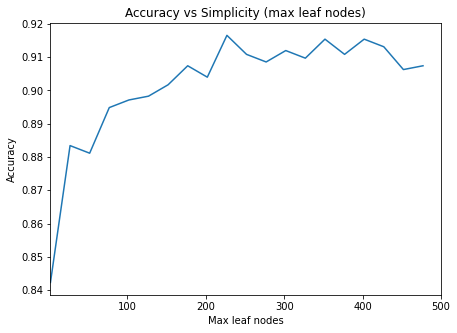

In [35]:
plt.figure(figsize=(7,5))
plt.plot(range(2,500,25),OS)
plt.xlabel("Max leaf nodes")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Simplicity (max leaf nodes)")
plt.xlim(2,500)
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid ={'max_leaf_nodes':range(2,500,25)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid)
rs= gr.fit(X_train,y_train)
print (rs.best_params_)
print ('Out of sample accuracy:',rs.score(X_test,y_test))

{'max_leaf_nodes': 402}
Out of sample accuracy: 0.912


digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="R <= 0.5, samples = 2039, value = [[1952, 87], [297, 1742], [1829, 210]]", fillcolor="#eeab7b"] ;
1 [label="TRUCK_ROUT <= 2.5, samples = 1585, value = [[1581, 4], [99, 1486], [1490, 95]]", fillcolor="#e68742"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 1511, value = [[1509, 2], [75, 1436], [1438, 73]]", fillcolor="#e58139"] ;
1 -> 2 ;
3 [label="samples = 74, value = [[72, 2], [24, 50], [52, 22]]", fillcolor="#f8deca"] ;
1 -> 3 ;
4 [label="StreetWidt <= 49.0, samples = 454, value = [[371, 83], [198, 256], [339, 115]]", fillcolor="#ffffff"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 433, value = [[352, 81], [179, 254], [335, 98]]", fillcolor="#fefbf9"] ;
4 -> 5 ;
6 [label="samples = 21, value = [[19, 2], [19, 2], [4, 17]]", fillcolor="#f1bd97"] ;
4 -> 6 ;
}


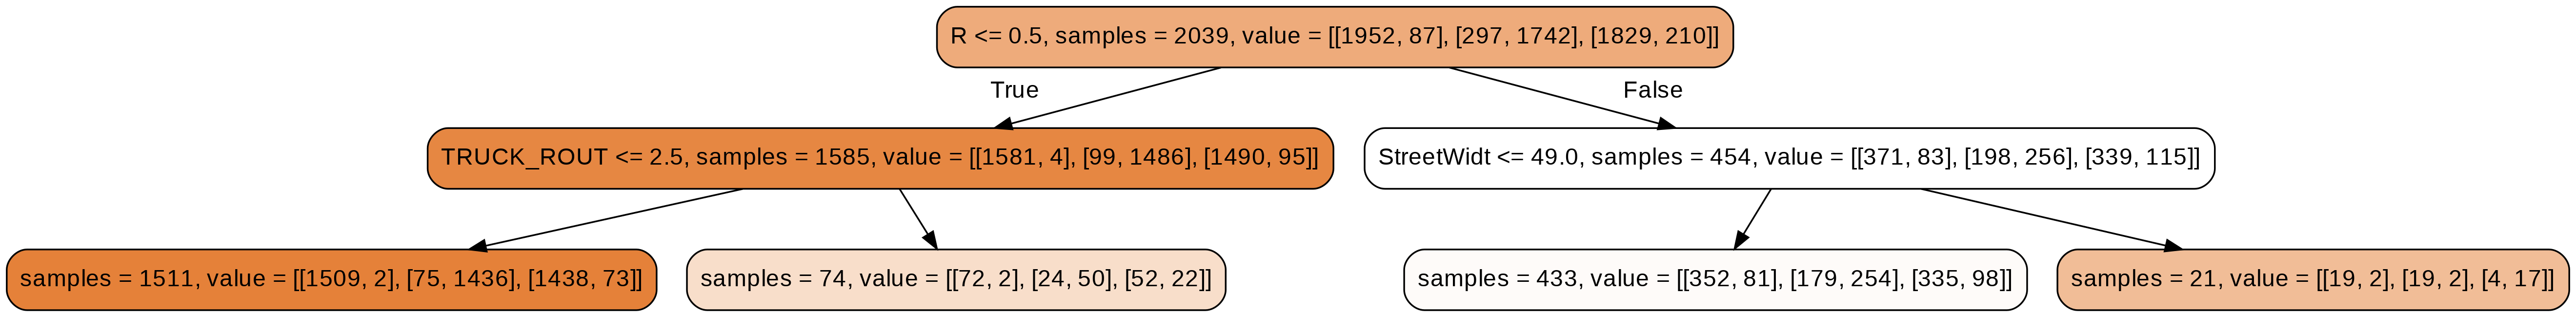

In [38]:
from sklearn import tree
from IPython.display import Image  
import pydotplus
import cv2

dt = DecisionTreeClassifier(max_depth=2) 
dt.fit(X_train,y_train)

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print(thestring)
graph = pydotplus.graph_from_dot_data(thestring) 
# pydot_graph= pydotplus.graph_from_dot_data(stream.getvalue()) 
graph.set_size('"55,15!"')
Image(graph.create_png())

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid ={'max_leaf_nodes':range(2,500,25)}
dt=RandomForestClassifier()
gr=GridSearchCV(dt,param_grid=param_grid)
rs= gr.fit(X_train,y_train)
print (rs.best_params_)
print ('Out of sample accuracy:',rs.score(X_test,y_test))

{'max_leaf_nodes': 327}
Out of sample accuracy: 0.9005714285714286


**Weekday Traffic Data**

In [41]:
weekday_RF2.shape

(3089, 21)

In [42]:
weekday_F=weekday_RF2.dropna()
weekday_F.shape

(3089, 21)

In [43]:
# Let's take'label'as the target variable. 
y=weekday_F.loc[:,'label']
y=pd.get_dummies(y)

# Get the feature space. 
X=weekday_F[[  'EB', 'NB', 'SB', 'WB',
       'StreetWidt', 'BikeLane', 'TRUCK_ROUT', 'SHAPE_Leng', 'B',
       'C', 'E', 'F', 'G', 'R', 'S', 'T', 'U']]

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
print (X_train.head())

      EB  NB  SB  WB  StreetWidt  BikeLane  TRUCK_ROUT  ...  E  F  G  R  S  T  U
1737   0   0   0   1        70.0       0.0         2.0  ...  0  0  0  0  0  0  1
248    0   1   0   0        48.0       0.0         0.0  ...  0  0  0  0  0  0  1
568    0   0   1   0        50.0       1.0         0.0  ...  0  0  0  0  0  0  1
2631   0   1   0   0        40.0       0.0         0.0  ...  0  0  0  0  0  0  1
1959   0   0   0   1        30.0       0.0         2.0  ...  0  0  0  0  0  0  1

[5 rows x 17 columns]


In [45]:
OS=[]
for i in range(2,500,25):
    
    dt = DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))
print (OS)

[0.8284789644012945, 0.8619201725997843, 0.8856526429341963, 0.8813376483279396, 0.8856526429341963, 0.8921251348435815, 0.8856526429341963, 0.8888888888888888, 0.8910463861920173, 0.889967637540453, 0.8867313915857605, 0.8932038834951457, 0.8921251348435815, 0.8975188781014024, 0.8910463861920173, 0.889967637540453, 0.895361380798274, 0.8910463861920173, 0.8878101402373247, 0.8910463861920173]


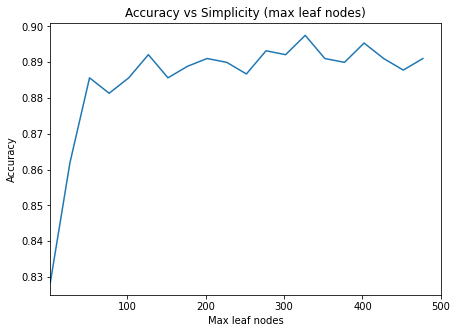

In [46]:
plt.figure(figsize=(7,5))
plt.plot(range(2,500,25),OS)
plt.xlabel("Max leaf nodes")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Simplicity (max leaf nodes)")
plt.xlim(2,500)
plt.show()

In [47]:
param_grid ={'max_leaf_nodes':range(2,500,25)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid)
rs= gr.fit(X_train,y_train)
print (rs.best_params_)
print ('Out of sample accuracy:',rs.score(X_test,y_test))

{'max_leaf_nodes': 227}
Out of sample accuracy: 0.8921251348435815


digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="R <= 0.5, samples = 2162, value = [[2062, 100], [342, 1820], [1920, 242]]", fillcolor="#eeac7d"] ;
1 [label="StreetWidt <= 63.0, samples = 1699, value = [[1695, 4], [125, 1574], [1578, 121]]", fillcolor="#e78b49"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 1523, value = [[1520, 3], [90, 1433], [1436, 87]]", fillcolor="#e68540"] ;
1 -> 2 ;
3 [label="samples = 176, value = [[175, 1], [35, 141], [142, 34]]", fillcolor="#f0b78d"] ;
1 -> 3 ;
4 [label="BikeLane <= 0.5, samples = 463, value = [[367, 96], [217, 246], [342, 121]]", fillcolor="#fefaf7"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 422, value = [[326, 96], [215, 207], [303, 119]]", fillcolor="#ffffff"] ;
4 -> 5 ;
6 [label="samples = 41, value = [[41, 0], [2, 39], [39, 2]]", fillcolor="#e58139"] ;
4 -> 6 ;
}


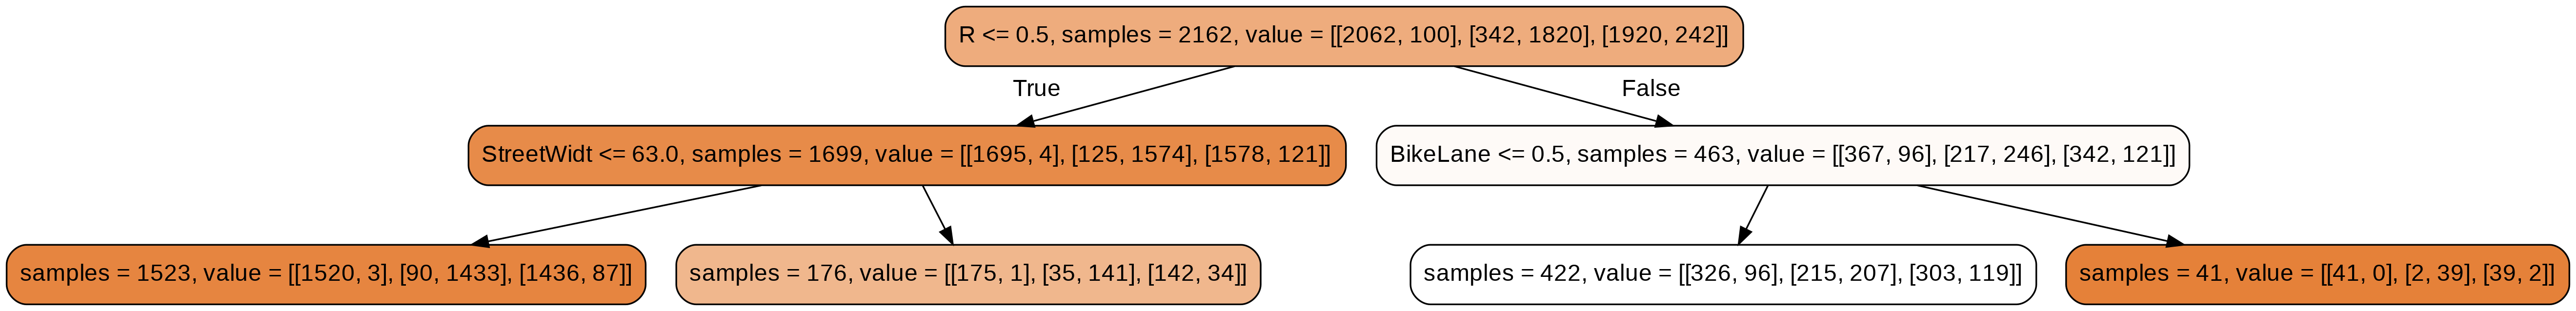

In [48]:
dt = DecisionTreeClassifier(max_depth=2) 
dt.fit(X_train,y_train)

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print(thestring)
graph = pydotplus.graph_from_dot_data(thestring) 
# pydot_graph= pydotplus.graph_from_dot_data(stream.getvalue()) 
graph.set_size('"55,15!"')
Image(graph.create_png())

In [49]:
param_grid ={'max_leaf_nodes':range(2,500,25)}
dt=RandomForestClassifier()
gr=GridSearchCV(dt,param_grid=param_grid)
rs= gr.fit(X_train,y_train)
print (rs.best_params_)
print ('Out of sample accuracy:',rs.score(X_test,y_test))

{'max_leaf_nodes': 227}
Out of sample accuracy: 0.889967637540453
